<figure>
  <IMG SRC="https://raw.githubusercontent.com/fmeer/public-files/main/TUlogo.png" WIDTH=200 ALIGN="right">
</figure>

# CIEM5110-2 Workshop 7.2: Time-dependent analysis
    
In this notebook, usage of the `ExplicitTimeModule` and `NewmarkModule` for time-dependent analysis of structures is explored. This is for solving dynamics problems in the time domain. The first of these is for explicit analysis with the central difference scheme, the second for implicit analysis with Newmark time integration. 
    
There is also an `NLNewmarkModule` for implicit analysis of nonlinear problems, but we will not use it here.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append('../../')

from utils import proputils as pu
import main
from names import GlobNames as gn

%matplotlib widget

# define a function we will use for plotting force and displacement signals
def plotForceDisp(globdat):
    plt.close('all')
    plt.figure()
    plt.plot(globdat['lodi']['left']['load']['dx'])
    plt.plot(globdat['lodi']['right']['load']['dx'])
    plt.legend(['left','right'])
    plt.ylabel('F')
    plt.show()
    plt.figure()
    plt.plot(globdat['lodi']['left']['disp']['dx'])
    plt.plot(globdat['lodi']['right']['disp']['dx'])
    plt.legend(['left','right'])
    plt.ylabel('u')
    plt.show()

### Analysis 1: Wave propagation in a bar, explicit
The first case concerns wave propagation in a bar. It is a bar problem, we have three models that can solve bar problems, the `BarModel`, the `SolidModel`, and the `FrameModel`. We use the last of these for its dedicated postprocessing routines. 

We first run the case with the explicit time module. Run the analysis below and have a look at force and displacement signals. 

Initializing module chain...
InitModule: Creating DofSpace...
InitModule: Reading geo mesh file beam.geom ...
InitModule: Creating node groups...
InitModule: Created group left with nodes [0]
InitModule: Created group right with nodes [1]
InitModule: Created group all with nodes [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
InitModule: Creating model...
Creating Line2Shape...
Running chain...
Running time step 0
Running time step 20
Running time step 40
Running time step 60
Running time step 80
Running time step 100
Running time step 120
Running time step 140
Running time step 160
Running time step 180
Running time step 200
Running time step 220
Running time step 240
Running time step 260
Running time step 280
Running time step 300
Running time step 320
Running time step 340
Running time step 360
Running time step 380
Running time step 400
Running time step 420
Running time step 440
Running time step 460
Running time step 480
Running time step 500
Running time step 5

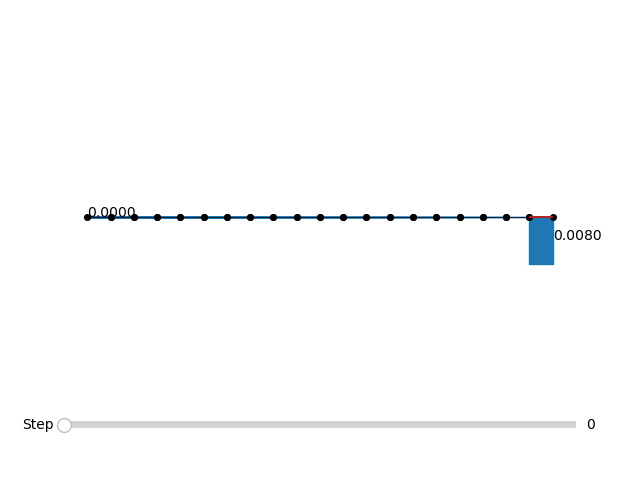

End of execution


In [2]:
props = pu.parse_file('bar_explicit.pro')
globdat = main.jive(props)


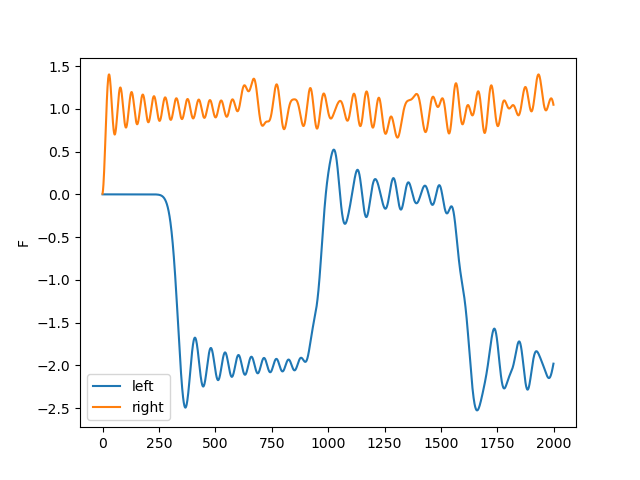

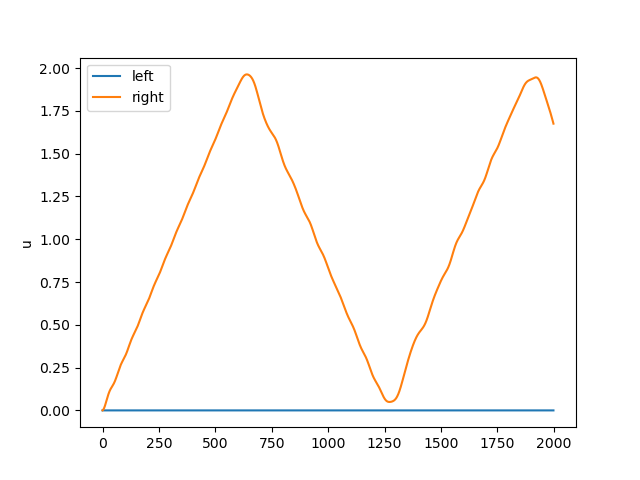

In [3]:
plotForceDisp(globdat)


### Analysis 2: Wave propagation in a bar, implicit

Now the same case is analyzed with the NewmarkModule. Check again what happens when you change the time step size. 

What happens when you add numerical damping? 


Initializing module chain...
InitModule: Creating DofSpace...
InitModule: Reading geo mesh file beam.geom ...
InitModule: Creating node groups...
InitModule: Created group left with nodes [0]
InitModule: Created group right with nodes [1]
InitModule: Created group all with nodes [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
InitModule: Creating model...
Creating Line2Shape...
Running chain...
Running time step 0
Running time step 20
Running time step 40
Running time step 60
Running time step 80
Running time step 100
Running time step 120
Running time step 140
Running time step 160
Running time step 180
Running time step 200
Running time step 220
Running time step 240
Running time step 260
Running time step 280
Running time step 300
Running time step 320
Running time step 340
Running time step 360
Running time step 380
Running time step 400
Running time step 420
Running time step 440
Running time step 460
Running time step 480
Running time step 500
Running time step 5

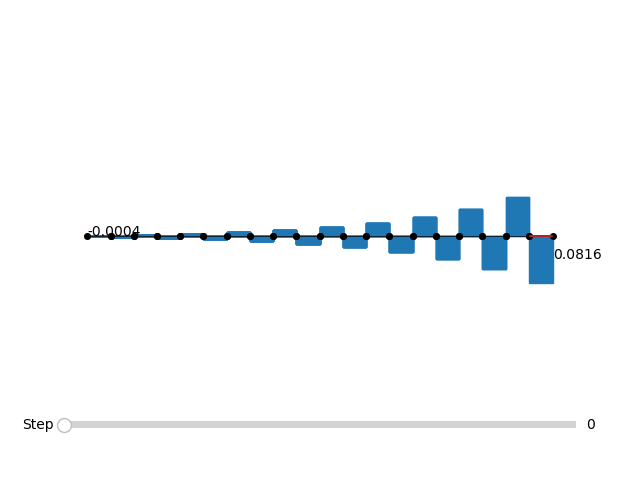

End of execution


In [18]:
props = pu.parse_file('bar_implicit.pro')
props['stepper']['gamma'] = 0.99
props['stepper']['beta'] = props['stepper']['gamma']/2
globdat = main.jive(props)


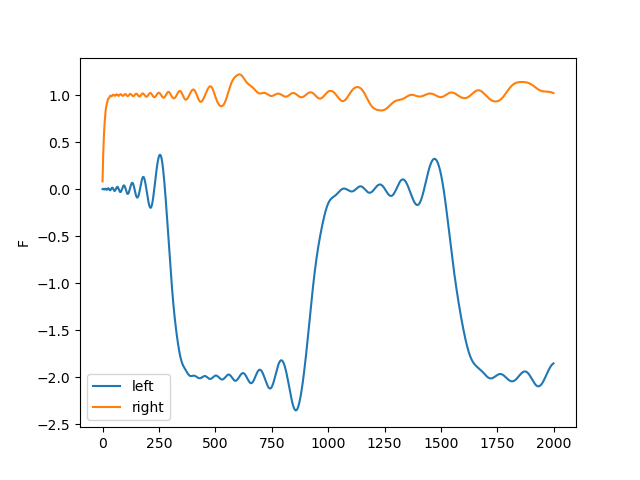

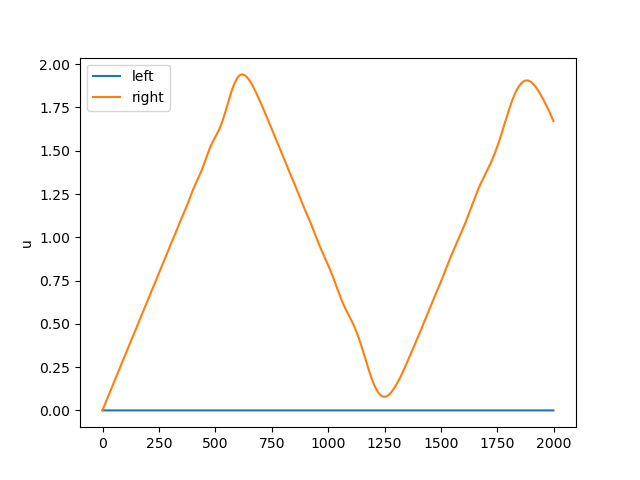

In [19]:
plotForceDisp(globdat)

### Analysis 3: Harmonically loaded bar
Now, instead of a constant load we apply an harmonic load. Check the input file how this is done.

Initializing module chain...
InitModule: Creating DofSpace...
InitModule: Reading geo mesh file beam.geom ...
InitModule: Creating node groups...
InitModule: Created group left with nodes [0]
InitModule: Created group right with nodes [1]
InitModule: Created group all with nodes [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
InitModule: Creating model...
Creating Line2Shape...
Running chain...
Running time step 0
Running time step 20
Running time step 40
Running time step 60
Running time step 80
Running time step 100
Running time step 120
Running time step 140
Running time step 160
Running time step 180
Running time step 200
Running time step 220
Running time step 240
Running time step 260
Running time step 280
Running time step 300
Running time step 320
Running time step 340
Running time step 360
Running time step 380
Running time step 400
Running time step 420
Running time step 440
Running time step 460
Running time step 480
Running time step 500
Running time step 5

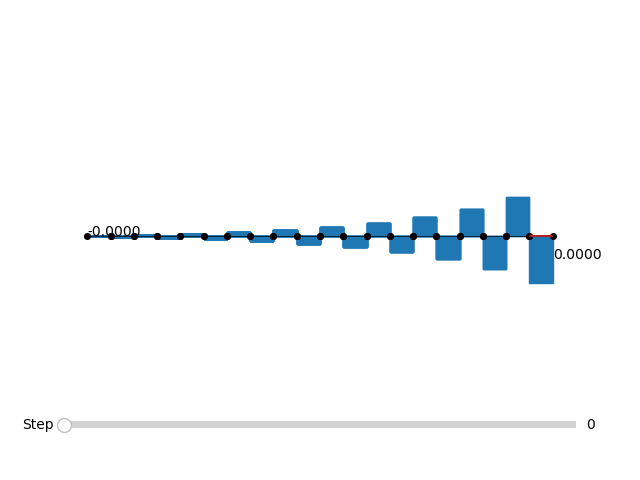

End of execution


In [22]:
props = pu.parse_file('bar_harmonic.pro')
props['stepper']['gamma'] = 0.99
props['stepper']['beta'] = props['stepper']['gamma']/2

globdat = main.jive(props)

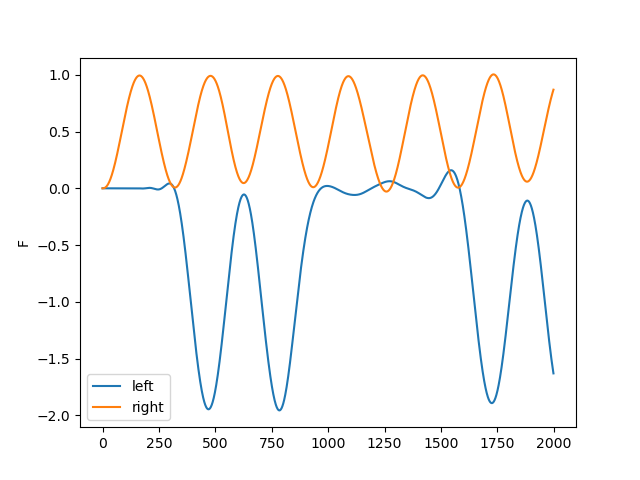

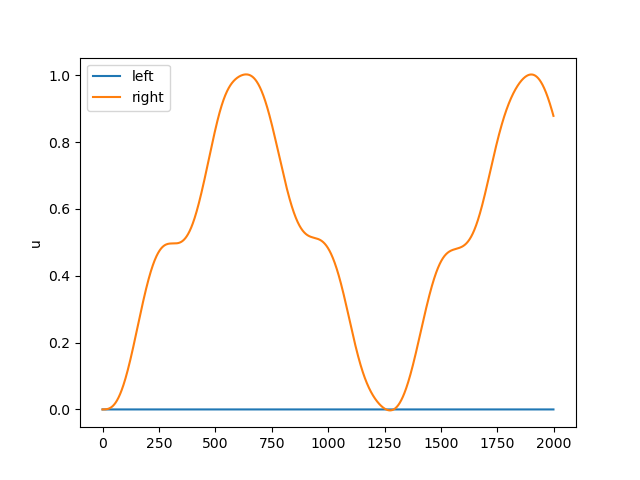

In [24]:
plotForceDisp(globdat)

What happens if you make the frequency of the harmonic load much lower? Try with a 100 times, don't forget to adapt deltaTime at two places in the properties.

Initializing module chain...
InitModule: Creating DofSpace...
InitModule: Reading geo mesh file beam.geom ...
InitModule: Creating node groups...
InitModule: Created group left with nodes [0]
InitModule: Created group right with nodes [1]
InitModule: Created group all with nodes [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
InitModule: Creating model...
Creating Line2Shape...
Running chain...
Running time step 0
Running time step 20
Running time step 40
Running time step 60
Running time step 80
Running time step 100
Running time step 120
Running time step 140
Running time step 160
Running time step 180
Running time step 200
Running time step 220
Running time step 240
Running time step 260
Running time step 280
Running time step 300
Running time step 320
Running time step 340
Running time step 360
Running time step 380
Running time step 400
Running time step 420
Running time step 440
Running time step 460
Running time step 480
Running time step 500
Running time step 5

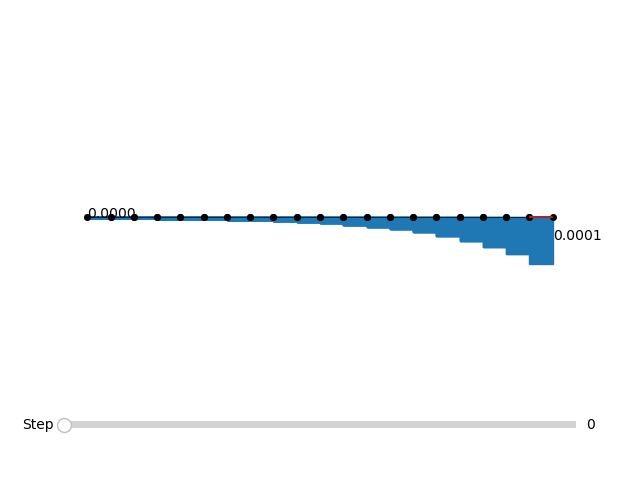

End of execution


In [25]:
props['model']['neum']['deltaTime'] = 1;
props['stepper']['deltaTime'] = 1;
props['model']['neum']['timeSignal']  = 'np.sin(0.01*t)**2'
globdat = main.jive(props)

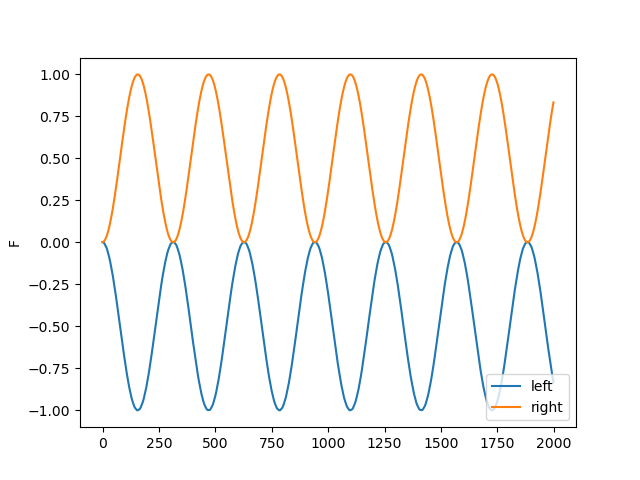

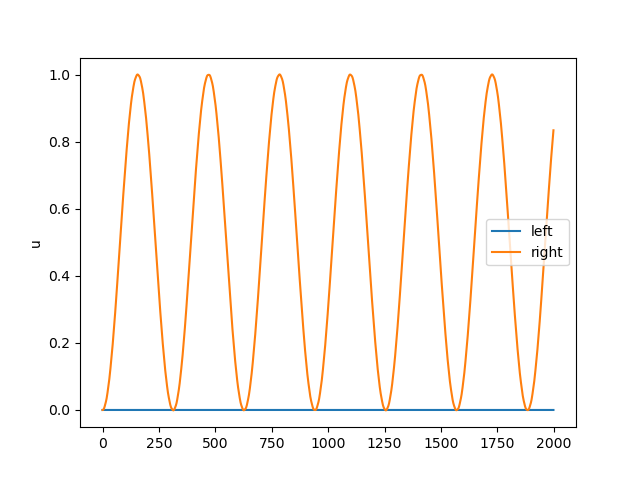

In [9]:
plotForceDisp(globdat)

Can you also get this result with the `ExplicitTimeModule`?